# Charge Time Machine Learning Algorithm Generation

## Splitting the data

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
import datetime 
import datetime as dt
import math as ma
df = pd.read_csv('data/chargeML.csv')
df=df._convert(numeric=True)
df=df.dropna()
#df['date2'] =  pd.to_datetime(df['date2'])
#df.index.to_pydatetime() 
#df=df.date2.to_pydatetime() 
df['date2']=pd.to_datetime(df.date2)
#df['date2'] =  pd.to_datetime(df['date2'])
df["dayInMonth"] =df['date2'].dt.day
inData=dataSet=df
## Need to add a cos function for day of week

df["cos_week"] = np.cos(df["dayOfWeek"]/7*2*ma.pi)
df["sin_hour"]=np.sin(df["dayOfWeek"]/7*2*ma.pi)

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1 # split per day of the month

#cutOffTestDate=2022.01.01
cutOffTestDate = datetime.datetime(2022, 3, 1)
testSet = dataSet.loc[(inData.date2 > cutOffTestDate), :]
mainSet = dataSet.loc[(inData.date2 <= cutOffTestDate), :]
trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date2 <= cutOffTestDate), :]
ogWindTrain = trainSet.ActualWind
ogWindValid = validSet.ActualWind
ogTrainSet=trainSet
ogValidSet=validSet

### Normalising the data

In [3]:
trainDate=trainSet.date2
validDate=validSet.date2
testDate=testSet.date2

In [4]:
trainSet=trainSet.drop('date2',1)
validSet=validSet.drop('date2',1)
testSet=testSet.drop('date2',1)
trainSet=trainSet.drop('dayInMonth',1)
validSet=validSet.drop('dayInMonth',1)
testSet=testSet.drop('dayInMonth',1)
trainSet=trainSet.drop('dayOfWeek',1)
validSet=validSet.drop('dayOfWeek',1)
testSet=testSet.drop('dayOfWeek',1)
trainSet=trainSet.drop('dayOfYear',1)
validSet=validSet.drop('dayOfYear',1)
testSet=testSet.drop('dayOfYear',1)
trainSet=trainSet.drop('hour',1)
validSet=validSet.drop('hour',1)
testSet=testSet.drop('hour',1)

/tmp/ipykernel_778614/1176180537.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('date2',1)
/tmp/ipykernel_778614/1176180537.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSet=validSet.drop('date2',1)
/tmp/ipykernel_778614/1176180537.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSet=testSet.drop('date2',1)
/tmp/ipykernel_778614/1176180537.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('dayInMonth',1)
/tmp/ipykernel_778614/1176180537.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In [5]:
trainSet.columns

Index(['ActualGenerationMW', 'ForecastWind', 'ActualWind', 'ActualDemand',
       'dub_wddir', 'dub_wdsp', 'dub_temp', 'dub_msl', 'don_wddir', 'don_wdsp',
       'don_temp', 'don_msl', 'cla_wddir', 'cla_wdsp', 'cla_temp', 'cla_msl',
       'cor_wddir', 'cor_wdsp', 'cor_temp', 'cor_msl', 'sin_hour', 'sin_day',
       'cos_hour', 'cos_day', 'sin_dub_wddir', 'cos_dub_wddir',
       'sin_cor_wddir', 'cos_cor_wddir', 'sin_cla_wddir', 'cos_cla_wddir',
       'sin_don_wddir', 'cos_don_wddir', 'cos_dub_vec', 'sin_dub_vec',
       'cos_cor_vec', 'sin_cor_vec', 'cos_cla_vec', 'sin_cla_vec',
       'cos_don_vec', 'sin_don_vec', 'year', 'month', 'totalImbalance',
       'totalImbalancep', 'imbalanceAverage', 'imbalanceVar',
       'imbalanceVarAvg', 'cos_week'],
      dtype='object')

In [6]:
usedColsForecast=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl']

usedColsForecastVec=['dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl',
    'cos_dub_vec', 'sin_dub_vec',
    'cos_cor_vec', 'sin_cor_vec', 'cos_cla_vec', 
    'sin_cla_vec','cos_don_vec', 'sin_don_vec']

In [7]:
train_mean = trainSet.mean()
train_std = trainSet.std()


train_meanSave=train_mean[usedColsForecast]
train_stdSave =train_std[usedColsForecast]

# Saving columns which are used to transform data used in future predictive modelling
np.savetxt("./models/train_meanSave.csv", train_meanSave, delimiter=",")
np.savetxt("./models/train_stdSave.csv", train_meanSave, delimiter=",")

train_df = (trainSet - train_mean) / train_std
val_df = (validSet - train_mean) / train_std
test_df = (testSet - train_mean) / train_std


train_meanSaveVec=train_mean[usedColsForecastVec]
train_stdSaveVec =train_std[usedColsForecastVec]

# Saving columns which are used to transform data used in future predictive modelling
np.savetxt("./models/train_meanSaveVec.csv", train_meanSave, delimiter=",")
np.savetxt("./models/train_stdSaveVec.csv", train_meanSave, delimiter=",")


In [8]:
#re-creating date-column
train_df['date2']=trainDate
val_df['date2']=validDate
test_df['date2']=testDate

# Re-adding removed columns
train_df['hour']=train_df['date2'].dt.hour
train_df['dayOfWeek']=train_df['date2'].dt.day_of_week
train_df['dayOfYear']=train_df['date2'].dt.day_of_year
train_df["dayInMonth"] =train_df['date2'].dt.day
# Re-adding removed columns
val_df['hour']=val_df['date2'].dt.hour
val_df['dayOfWeek']=val_df['date2'].dt.day_of_week
val_df['dayOfYear']=val_df['date2'].dt.day_of_year
val_df["dayInMonth"] =val_df['date2'].dt.day
# Re-adding removed columns
test_df['hour']=test_df['date2'].dt.hour
test_df['dayOfWeek']=test_df['date2'].dt.day_of_week
test_df['dayOfYear']=test_df['date2'].dt.day_of_year
test_df["dayInMonth"] =test_df['date2'].dt.day

#Resetting the Actual Generation to be non-continuous
train_df['ActualGenerationMW']=train_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
val_df['ActualGenerationMW']=val_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
test_df['ActualGenerationMW']=test_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
# Re-setting the names of the columns
trainSet=train_df
validSet=val_df
testSet=test_df

In [77]:
y_train = ogTrainSet.ActualWind
y_valid = ogValidSet.ActualWind
y_test = testSet.ActualWind
X_train = trainSet
X_valid = validSet 

## Random forest generation

### Choosing Columns

In [10]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir',]]
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [11]:
X_valid.columns

Index(['ActualGenerationMW', 'ForecastWind', 'ActualWind', 'ActualDemand',
       'dub_wddir', 'dub_wdsp', 'dub_temp', 'dub_msl', 'don_wddir', 'don_wdsp',
       'don_temp', 'don_msl', 'cla_wddir', 'cla_wdsp', 'cla_temp', 'cla_msl',
       'cor_wddir', 'cor_wdsp', 'cor_temp', 'cor_msl', 'sin_hour', 'sin_day',
       'cos_hour', 'cos_day', 'sin_dub_wddir', 'cos_dub_wddir',
       'sin_cor_wddir', 'cos_cor_wddir', 'sin_cla_wddir', 'cos_cla_wddir',
       'sin_don_wddir', 'cos_don_wddir', 'cos_dub_vec', 'sin_dub_vec',
       'cos_cor_vec', 'sin_cor_vec', 'cos_cla_vec', 'sin_cla_vec',
       'cos_don_vec', 'sin_don_vec', 'year', 'month', 'totalImbalance',
       'totalImbalancep', 'imbalanceAverage', 'imbalanceVar',
       'imbalanceVarAvg', 'cos_week', 'date2', 'hour', 'dayOfWeek',
       'dayOfYear', 'dayInMonth'],
      dtype='object')

In [12]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]
X_valid1 = X_valid[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]

# Version 2
X_train1 = X_train[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]
X_valid1 = X_valid[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]


# Version 

X_train1 = X_train[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','don_wdsp','cor_wdsp','cla_wdsp','dub_msl','don_wdsp','cos_cor_wddir','sin_cor_wddir','dub_temp','cos_dub_wddir','sin_dub_wddir']]
X_valid1 = X_valid[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','don_wdsp','cor_wdsp','cla_wdsp','dub_msl','don_wdsp','cos_cor_wddir','sin_cor_wddir','dub_temp','cos_dub_wddir','sin_dub_wddir']]


In [78]:
#Version 2:
X_train2 = X_train[usedColsForecastVec]
X_valid2 = X_valid[usedColsForecastVec]
# Above produces shitty results for ?? reason

#Version 3:
X_train3 = X_train[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','sin_cor_vec','cos_cor_vec','cos_cla_vec','sin_cla_vec']]
X_valid3 = X_valid[['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','sin_cor_vec','cos_cor_vec','cos_cla_vec','sin_cla_vec']]

In [14]:
'''
#Import Random Forest "Classifier" Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)
clf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)
#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test)

# Training the model
clf.fit(X_train1,y_train)

#Returning predicted data
y_pred=clf.predict(X_valid1)

#Using test for training data will run into issues

#X_test1 = X_test[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]
#y_testpred=clf.predict(X_test1)


# Plotting last week of data
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))'''

'\n#Import Random Forest "Classifier" Model\nfrom sklearn.ensemble import RandomForestClassifier\n\n#Create a Gaussian Classifier\n#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)\nclf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)\n#clf=RandomForestClassifier(n_estimators=100,random_state = 43)\nprint(clf.get_params())\n#Train the model using the training sets y_pred=clf.predict(X_test)\n\n# Training the model\nclf.fit(X_train1,y_train)\n\n#Returning predicted data\ny_pred=clf.predict(X_valid1)\n\n#Using test for training data will run into issues\n\n#X_test1 = X_test[[\'ForecastWind\',\'dayOfWeek\',\'dub_msl\',\'hour\',\'dub_wddir\']]\n#y_testpred=clf.predict(X_test1)\n\n\n# Plotting last week of data\nimport matplotlib.pyplot as plt \nfrom matplotlib.pyplot import figure\n\nplt.plot(X_valid[\'date2\'][-7*24:],y_pred[-7*24:],color = \'blue\')\nplt.plot(X_valid[\'date2\'][-7*24:],y_valid[-7*2


### Example Baselines 

clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using  [['ForecastWind','sin_day','sin_hour']]
Mean Absolute Error: 574.4672045420589
Mean Squared Error: 532948.2448827133
Root Mean Squared Error: 730.0330436923477



clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using [['ForecastWind','sin_day','sin_hour','dub_wddir','dub_wdsp','dub_msl']]
Mean Absolute Error: 594.1552368145824
Mean Squared Error: 585698.313312416
Root Mean Squared Error: 765.3092925820357


### Reggresion model

In [15]:
from sklearn.ensemble import RandomForestRegressor

rrf=RandomForestRegressor(n_estimators=500,random_state = 42, max_depth=400, max_leaf_nodes=400)
#rrf=RandomForestRegressor(n_estimators=100,random_state = 42)

#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
#print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test

In [16]:
rrf.fit(X_train1,y_train)

RandomForestRegressor(max_depth=400, max_leaf_nodes=400, n_estimators=500,
                      random_state=42)

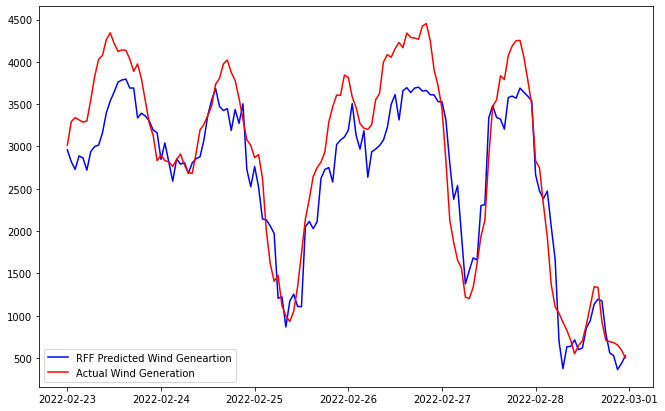

In [17]:
y_pred=rrf.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-6*24:],y_pred[-6*24:],color = 'blue',label = 'RFF Predicted Wind Geneartion')
plt.plot(X_valid['date2'][-6*24:],y_valid[-6*24:],color = 'red',label = 'Actual Wind Generation')
plt
fig = plt.gcf()
plt.legend()
#plt.size(7,7)
fig.set_size_inches(11, 7)

fig.savefig('MLImages/rForestForecast2.png', dpi=100)

In [18]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 320.09325885475073
Mean Squared Error: 176364.45774249037
Root Mean Squared Error: 419.9576856571271


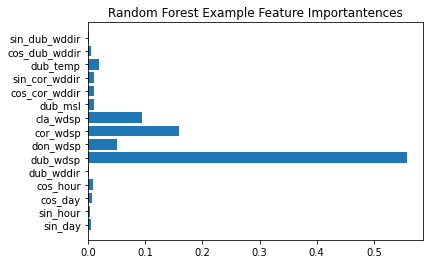

In [19]:
plt.barh(X_valid1.columns, rrf.feature_importances_)
plt.title("Random Forest Example Feature Importantences")
plt.savefig("MLImages/RforestImportances1.png")
plt.show()

In [20]:
rrf2=RandomForestRegressor(n_estimators=200,random_state = 42)
rrf2.fit(X_train3,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [21]:
y_pred2=rrf2.predict(X_valid3)

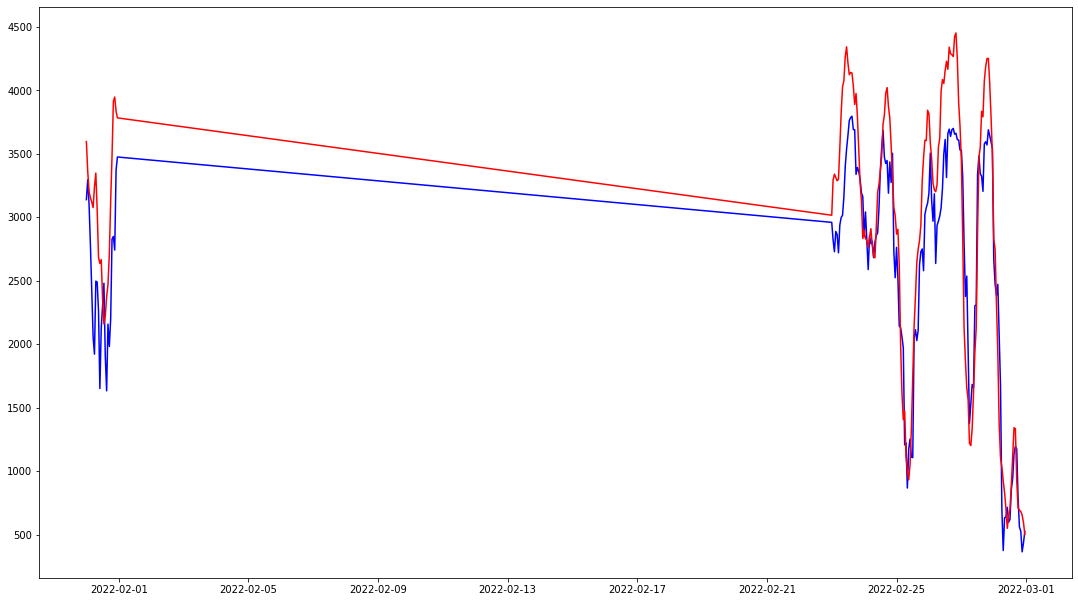

In [22]:

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('randomForestVec.png', dpi=100)

Y u so bad ?

In [23]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred2)))

Mean Absolute Error: 380.6242932085637
Mean Squared Error: 248819.73832963983
Root Mean Squared Error: 498.81834201404405


<BarContainer object of 11 artists>

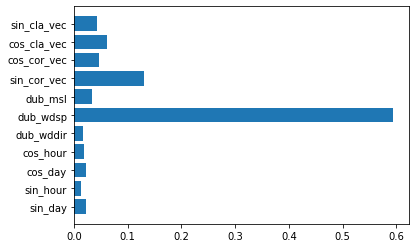

In [24]:
plt.barh(X_valid3.columns, rrf2.feature_importances_)

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 465.79800324008335
Mean Squared Error: 332345.30211887945
Root Mean Squared Error: 576.4939740525302

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 479.4909188704617
Mean Squared Error: 362932.07708576124
Root Mean Squared Error: 602.438442569663

## Using Tenserflow

In [25]:
import tensorflow_decision_forests as tfdf


2022-07-26 18:46:06.510836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-26 18:46:06.510894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
trainSetTF=trainSet
validSetTF=validSet
testSetTF=testSet

In [27]:
#Dropping time from the train and test columns
trainSetTF=trainSetTF.drop('date2',1)
validSetTF=validSetTF.drop('date2',1)
testSetTF=testSetTF.drop('date2',1)
trainSetTF=trainSetTF.drop('dayInMonth',1)
validSetTF=validSetTF.drop('dayInMonth',1)
testSetTF=testSetTF.drop('dayInMonth',1)
trainSetTF=trainSetTF.drop('dayOfWeek',1)
validSetTF=validSetTF.drop('dayOfWeek',1)
testSetTF=testSetTF.drop('dayOfWeek',1)
trainSetTF=trainSetTF.drop('dayOfYear',1)
validSetTF=validSetTF.drop('dayOfYear',1)
testSetTF=testSetTF.drop('dayOfYear',1)
trainSetTF=trainSetTF.drop('hour',1)
validSetTF=validSetTF.drop('hour',1)
testSetTF=testSetTF.drop('hour',1)

/tmp/ipykernel_778614/4217556139.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('date2',1)
/tmp/ipykernel_778614/4217556139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSetTF=validSetTF.drop('date2',1)
/tmp/ipykernel_778614/4217556139.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSetTF=testSetTF.drop('date2',1)
/tmp/ipykernel_778614/4217556139.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('dayInMonth',1)
/tmp/ipykernel_778614/4217556139.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will

In [28]:

'''
trainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
testSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

'\ntrainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\ntestSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\n'

In [29]:

y_trainTF = trainSetTF.ActualGenerationMW
y_validTF = validSetTF.ActualGenerationMW
y_testTF = testSetTF.ActualGenerationMW

#Version 1; Causing failures on kernel for ? reason
X_trainTF = trainSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]
X_validTF = validSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]


In [30]:
# Running into difficulty converting these columns, so I reset the value of X_train to include ActualGenerationMW
label = "ActualGenerationMW"
'''
y_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_validTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_testTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_testTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

X_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)

X_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_validTF, label=label, task=tfdf.keras.Task.REGRESSION)

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-07-26 18:46:09.449625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-26 18:46:09.449680: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-26 18:46:09.449713: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x20217366): /proc/driver/nvidia/version does not exist
/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except

In [31]:
#Using keras
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(x=X_trainTF)

Use /tmp/tmpvv8c_71v as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.204791. Found 19674 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpvv8c_71v/model/ with prefix 65e8bf45acfc4700
[INFO abstract_model.cc:1246] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:18.537798
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [32]:
# Not sure what test_ds should be
'''
import math
# Evaluate the model on the test dataset.
model_7.compile(metrics=["mse"])
evaluation = model_7.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")'''

'\nimport math\n# Evaluate the model on the test dataset.\nmodel_7.compile(metrics=["mse"])\nevaluation = model_7.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")'

In [33]:
# Not sure why, but this is
'''y_pred=model_7.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)'''

"y_pred=model_7.predict(X_valid1)\nimport matplotlib.pyplot as plt \nfrom matplotlib.pyplot import figure\n\nplt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')\nplt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')\nfig = plt.gcf()\nfig.set_size_inches(18.5, 10.5)\nfig.savefig('test2png.png', dpi=100)"

In [34]:
### Another TF model

using_col_list = ['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']
using_col_list.remove('ActualGenerationMW')
feature_list = []
for col in using_col_list:
    feature_list.append(tfdf.keras.FeatureUsage(name=col,semantic=tfdf.keras.FeatureSemantic.NUMERICAL))


model8 = tfdf.keras.RandomForestModel(features = feature_list, task = tfdf.keras.Task.REGRESSION,
    exclude_non_specified_features=True,
    num_trees=1000, max_depth=16,
    split_axis="SPARSE_OBLIQUE",categorical_algorithm="RANDOM",
    missing_value_policy='RANDOM_LOCAL_IMPUTATION',
    sparse_oblique_normalization='STANDARD_DEVIATION',
    compute_oob_variable_importances=True,
    winner_take_all=False)
                                                

#model8.compile(metrics=["Accuracy"])


Use /tmp/tmptusmaub5 as temporary training directory


In [35]:
from wurlitzer import sys_pipes
with sys_pipes():
    model8.fit(X_trainTF)

Reading training dataset...
Training dataset read in 0:00:00.652090. Found 19674 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmptusmaub5/model/ with prefix 6257204bcd9a4556
[INFO abstract_model.cc:1246] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:08:28.039115
Compiling model...
Model compiled.


In [36]:
# Not sure what test_ds should be
'''
# Evaluate the model on the test dataset.
model8.compile(metrics=["mse"])
evaluation = model8.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")
#print(f"MAE: {evaluation['mae']}")
'''

'\n# Evaluate the model on the test dataset.\nmodel8.compile(metrics=["mse"])\nevaluation = model8.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")\n#print(f"MAE: {evaluation[\'mae\']}")\n'

Not sure if I'll get much better then above

## Tenserflow Setup

In [37]:
train_df

,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,dub_wddir,dub_wdsp,dub_temp,dub_msl,don_wddir,don_wdsp,...,totalImbalancep,imbalanceAverage,imbalanceVar,imbalanceVarAvg,cos_week,date2,hour,dayOfWeek,dayOfYear,dayInMonth
358,4424.0,0.522420,0.738779,0.349140,-0.863493,0.920818,-0.369401,-0.125044,-0.591666,0.171683,...,-0.393424,0.155009,-0.611777,0.266910,1.414933,2019-04-15 22:00:00,22,0,105,15
359,4047.0,0.254813,0.369932,-0.210330,-0.732076,0.745700,-0.408998,-0.078412,-0.477421,0.306909,...,-0.201269,0.156442,-0.485531,0.265035,1.414933,2019-04-15 23:00:00,23,0,105,15
360,3558.0,-0.011142,-0.154712,-0.667444,-0.994911,0.395463,-0.468392,-0.062868,-0.591666,0.712588,...,-0.378643,0.157464,-0.331951,0.264420,0.881553,2019-04-16 00:00:00,0,1,106,16
361,3385.0,-0.315916,-0.498218,-0.852384,-0.994911,-0.129892,-0.448594,-0.039552,-0.705911,0.577362,...,-0.404510,0.155858,-0.203451,0.264381,0.881553,2019-04-16 01:00:00,1,1,106,16
362,3574.0,-0.555441,-0.555469,-1.003592,-0.994911,-0.305011,-0.507989,-0.055096,-0.705911,0.442135,...,0.184888,0.154995,-0.237645,0.262835,0.881553,2019-04-16 02:00:00,2,1,106,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27489,4992.0,0.002899,0.406535,-0.071916,0.319266,-0.305011,0.541318,-0.669084,0.550785,-0.098770,...,1.324882,0.709731,-0.678327,-1.113124,0.881553,2022-05-22 20:00:00,20,6,142,22
27490,4659.0,-0.215977,0.132481,-0.208004,0.450684,-0.305011,0.422529,-0.661312,0.550785,-0.369223,...,0.925792,0.709081,-0.689545,-1.118915,0.881553,2022-05-22 21:00:00,21,6,142,22
27491,4339.0,-0.374559,-0.114355,-0.277792,0.450684,0.045226,0.204748,-0.676855,0.208050,-0.369223,...,0.445405,0.706679,-0.671697,-1.124584,0.881553,2022-05-22 22:00:00,22,6,142,22
27492,3757.0,-0.381166,-0.110601,-0.674423,0.582102,0.395463,0.046362,-0.700171,0.093805,-0.098770,...,0.000123,0.702884,-0.577451,-1.129430,0.881553,2022-05-22 23:00:00,23,6,142,22


In [38]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl','ActualGenerationMW']

train_df3 = train_df[usedCols]
val_df3 = val_df[usedCols]
test_df3 = test_df[usedCols]

In [39]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])



In [40]:
@property
def train(self):
  return self.make_dataset(self.train_df3)

@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example



In [41]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [42]:
def plot(self, model=None, plot_col='ActualGenerationMW', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot


# Baseline Model

In [43]:
import tensorflow as tf

In [44]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['ActualGenerationMW'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['ActualGenerationMW']

In [45]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [46]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

baseline = Baseline(label_index=column_indices['ActualGenerationMW'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

221/221 [==============================] - 2s 5ms/step - loss: 18810144.0000 - mean_absolute_error: 4249.8535


In [47]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['ActualGenerationMW'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['ActualGenerationMW']

Input shape: (32, 24, 21)
Output shape: (32, 24, 1)


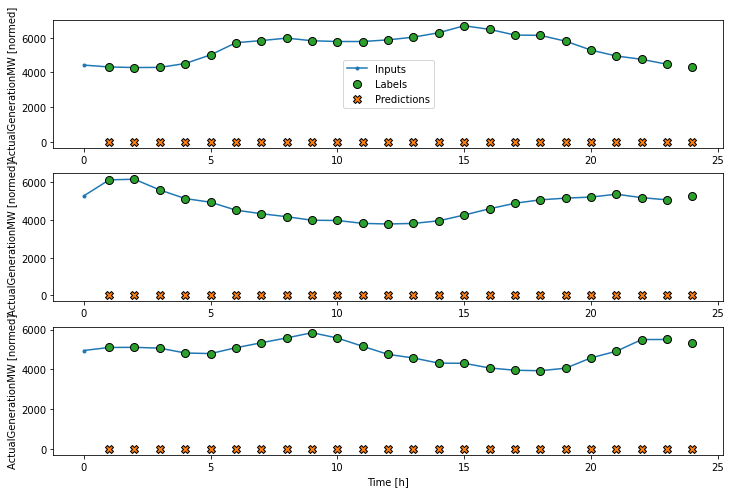

In [48]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)
wide_window.plot(baseline)

## Convolutional Neural Network


In [49]:
'''# I think this could be important,
# If convulutional width is set to 3, then given 3 hours of inputs it predicts 1 hour into the future
# We want for 
CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ActualGenerationMW'])

conv_window'''

"# I think this could be important,\n# If convulutional width is set to 3, then given 3 hours of inputs it predicts 1 hour into the future\n# We want for \nCONV_WIDTH = 3\n\nconv_window = WindowGenerator(\n    input_width=CONV_WIDTH,\n    label_width=1,\n    shift=1,\n    label_columns=['ActualGenerationMW'])\n\nconv_window"

In [50]:
'''conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])'''

"conv_model = tf.keras.Sequential([\n    tf.keras.layers.Conv1D(filters=32,\n                           kernel_size=(CONV_WIDTH,),\n                           activation='relu'),\n    tf.keras.layers.Dense(units=32, activation='relu'),\n    tf.keras.layers.Dense(units=1),\n])"

## Artificial Neural Networks

In [51]:
import tensorflow as tf
ann = tf.keras.models.Sequential([            
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_1"),
          tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_2"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_3"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
          tf.keras.layers.Dense(units=1, name="output_layer")
          ])

ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
#copying stuff from document...
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

In [53]:
y_train = ogTrainSet.ActualWind

In [54]:
ann.fit(X_train1,y_train, batch_size=20, epochs=20)

Epoch 1/20
984/984 [==============================] - 6s 4ms/step - loss: 1435.6732 - mae: 1435.6732
Epoch 2/20
984/984 [==============================] - 4s 4ms/step - loss: 1331.5662 - mae: 1331.5662
Epoch 3/20
984/984 [==============================] - 4s 4ms/step - loss: 1014.7663 - mae: 1014.7663
Epoch 4/20
984/984 [==============================] - 4s 4ms/step - loss: 602.9748 - mae: 602.9748
Epoch 5/20
984/984 [==============================] - 4s 4ms/step - loss: 497.1585 - mae: 497.1585
Epoch 6/20
984/984 [==============================] - 4s 4ms/step - loss: 472.1857 - mae: 472.1857
Epoch 7/20
984/984 [==============================] - 4s 4ms/step - loss: 456.9494 - mae: 456.9495
Epoch 8/20
984/984 [==============================] - 4s 4ms/step - loss: 443.7839 - mae: 443.7839
Epoch 9/20
984/984 [==============================] - 4s 4ms/step - loss: 435.0010 - mae: 435.0010
Epoch 10/20
984/984 [==============================] - 4s 4ms/step - loss: 423.5753 - mae: 423.5753
Epo

In [55]:
y_predANN=ann.predict(X_valid1)

221/221 [==============================] - 1s 2ms/step


In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 320.09325885475073
Mean Squared Error: 176364.45774249037
Root Mean Squared Error: 419.9576856571271


For lr=0.002 and  batch_size=200, epochs=100)

Mean Absolute Error: 470.42779251935326
Mean Squared Error: 353878.8971401352
Root Mean Squared Error: 594.877211817813

For lr=0.0002 and  batch_size=200, epochs=100)
Mean Absolute Error: 478.03476671201486
Mean Squared Error: 364369.589799041
Root Mean Squared Error: 603.6303420132565

For lr=0.0002 and  batch_size=200, epochs=150)
Mean Absolute Error: 470.0360041216103
Mean Squared Error: 354797.59158343874
Root Mean Squared Error: 595.648882802141

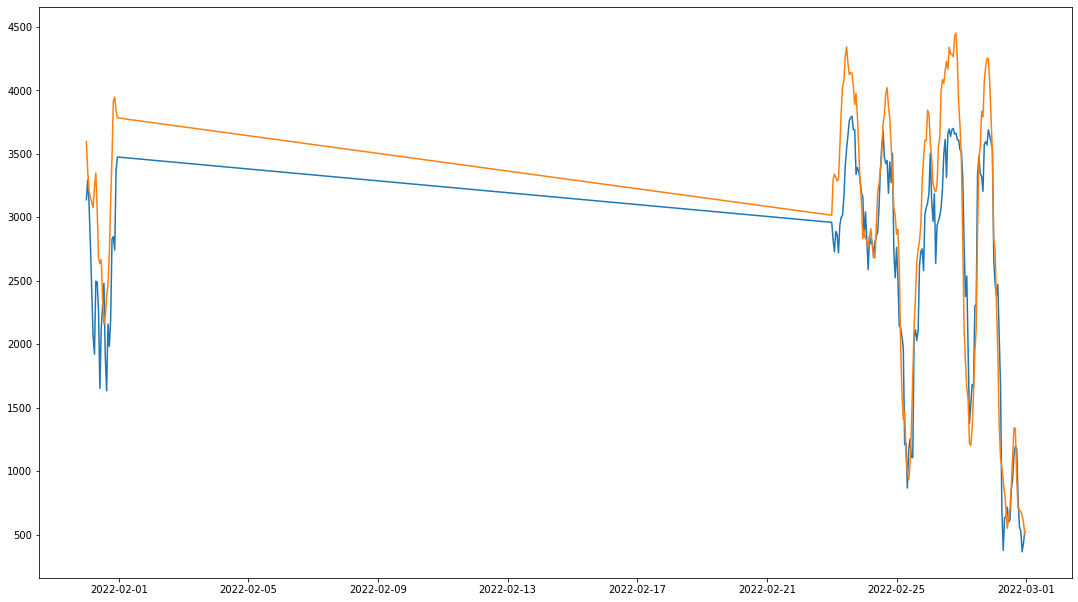

In [57]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:])
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [58]:
#plt.barh(X_valid1.columns, ann.feature_importances_)

### Single hour ANN Forecasting

In [79]:
ann1 = tf.keras.models.Sequential([            
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_1"),
        tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_2"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=120, activation='relu', name="Layer_3"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
        tf.keras.layers.Dense(units=1, name="output_layer")
        ])

ann1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
          optimizer=tf.keras.optimizers.Adam(lr=0.002),
          metrics=["mae"])



history = ann1.fit(X_train2, y_train, epochs = 30, validation_data=(X_valid2,y_valid), verbose=0)
# history = ann.fit(X_train_normal, y_train, epochs = 20, validation_data=(X_valid_normal,y_valid), callbacks=[es])


/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


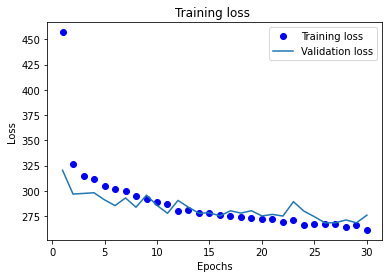

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss, label='Validation loss')
plt.title('Training loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
ann.save('models/ann_model')

INFO:tensorflow:Assets written to: models/ann_model/assets


INFO:tensorflow:Assets written to: models/ann_model/assets


## Muliple hour input Forecasting

Below from https://www.tensorflow.org/tutorials/structured_data/time_series

In [59]:
import IPython
import IPython.display

In [60]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=0,
                     label_columns=['ActualGenerationMW'])
w2

Total window size: 6
Input indices: [0 1 2 3 4 5]
Label indices: [5]
Label column name(s): ['ActualGenerationMW']

In [61]:


# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df3[:w2.total_window_size]),
                           np.array(train_df3[100:100+w2.total_window_size]),
                           np.array(train_df3[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6, 21)
Inputs shape: (3, 6, 21)
Labels shape: (3, 1, 1)


In [62]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

Total window size: 3
Input indices: [0 1 2]
Label indices: [2]
Label column name(s): ['ActualGenerationMW']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

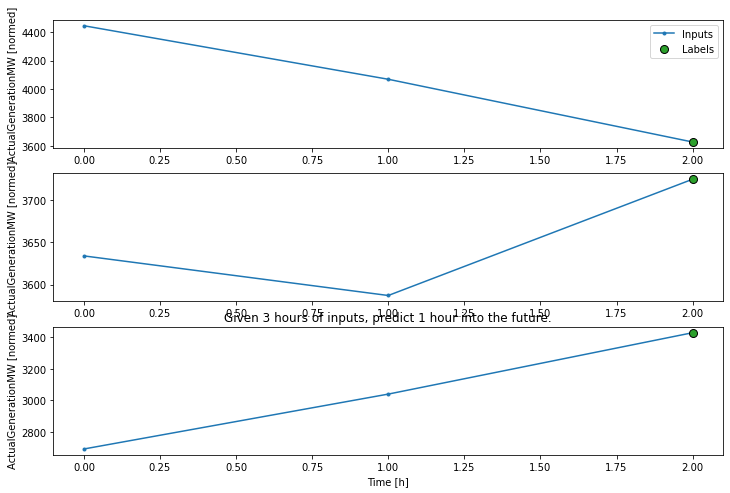

In [63]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [64]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

### Multi-step dense model

In [65]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [66]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

221/221 [==============================] - 2s 7ms/step - loss: 10.8234 - mean_absolute_error: 2.9721


### conv_model

In [67]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [68]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

221/221 [==============================] - 2s 8ms/step - loss: 0.1287 - mean_absolute_error: 0.2562


In [69]:
conv_window.train

<MapDataset element_spec=(TensorSpec(shape=(None, 3, 21), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [70]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [71]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl','ActualGenerationMW']

train_df3 = train_df[usedCols]
val_df3 = val_df[usedCols]
test_df3 = test_df[usedCols]

In [72]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df3, val_df=val_df3, test_df=test_df3,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 24
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df3)


@property
def trainX(self):
  return self.make_dataset(self.train_df3X)

@property
def trainY(self):
  return self.make_dataset(self.train_df3Y)


@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def valX(self):
  return self.make_dataset(self.val_df3X)

@property
def valY(self):
  return self.make_dataset(self.val_df3Y)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Data is  given by (5470, 21)
Input data is given by (5470, 20)
targets are given by (5470, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
171/171 [==============================] - 2s 9ms/step - loss: 833469.3750 - mean_absolute_error: 680.2849
Data is  given by (2735, 21)
Input data is given by (2735, 20)
targets are given by (2735, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


#### Generating basic plots

In [73]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

y_predRFF=rrf.predict(X_valid1)

y_valid =        val_df['ActualWind'].iloc[2:]
y_forecasted = val_df['ForecastWind'].iloc[2:]


y_predAr=conv_model.predict(conv_window.val)
y_pred=y_predAr[:,0]
y_forecast = ogValidSet.ForecastWind


y_valid=val_df3['ActualWind']
#og here


plt.plot(X_valid['date2'][-6*24:],y_pred[-6*24:],color = 'cyan',label = 'ANN Modeled Wind Generation')
plt.plot(X_valid['date2'][-6*24:],y_valid[-6*24:],color = 'red',label = 'Actual Wind Generation')
plt.plot(X_valid['date2'][-6*24:],y_forecast[-6*24:],color = 'blue', label = 'ESB Forecasted Wind Generation')
plt.plot(X_valid['date2'][-6*24:],y_predRFF[-6*24:],color = 'purple',label = 'RFF Predicted Wind Geneartion')


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc=1)
fig = plt.gcf()
fig.set_size_inches(15, 7)

fig.savefig('MLImages/ModelWeekDisplay.png', dpi=100)

Data is  given by (5470, 21)
Input data is given by (5470, 20)
targets are given by (5470, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
171/171 [==============================] - 2s 8ms/step


KeyError: 'ActualWind'

In [ ]:
from sklearn import metrics 
#og stuff
y_valid =        ogValidSet.ForecastWind.iloc[2:]
y_forecasted = ogValidSet.ActualWind.iloc[2:]

MAEAN2=metrics.mean_absolute_error(y_valid, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


y_valid2 = ogValidSet['ActualWind']
print('\n')
MAEFOR=metrics.mean_absolute_error(y_valid2, y_predRFF)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid2, y_predRFF))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid2, y_predRFF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid2, y_predRFF)))

MAERFF=metrics.mean_absolute_error(y_valid, y_forecasted)
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_forecasted)))

MAEANN=metrics.mean_absolute_error(y_valid2, y_predANN)
print('\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid2, y_predANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid2, y_predANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid2, y_predANN)))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt




width = 0.25


plt.bar(x = 1, height = MAEAN2, color = 'b', width = width, edgecolor = 'black',label='MAE Multi hour')
plt.bar(x = 2, height = MAEANN, color = 'r', width = width, edgecolor = 'black',label='MAE single hour ANN')
plt.bar(x = 3, height = MAEFOR, color = 'purple', width = width, edgecolor = 'purple',label='MAE  Random Forest')

plt.bar(x = 4, height = MAERFF, color = 'cyan', width = width, edgecolor = 'purple',label='MAE Forecast Wind')

plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")
plt.title("Accuracy of various ML Algorithms")

# plt.grid(linestyle='--')
#plt.xticks(r + width/2,['2018','2019','2020','2021'])
plt.legend(loc=[0,0])
plt.savefig('MLImages/AccuracyScores.png')
plt.show()


In [ ]:
conv_model.save('models/conv_model')

#### Can I get a Hell yeah
_Helia_

In [ ]:
def plot(self, model=None, plot_col='ActualGenerationMW', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ActualGenerationMW'])

wide_conv_window

wide_conv_window.plot(conv_model)

In [ ]:
adsf;ligb

In [ ]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl','ActualWind']


train_df3 = train_df[usedCols]
val_df3 = val_df[usedCols]
test_df3 = test_df[usedCols]

In [ ]:

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df3, val_df=val_df3, test_df=test_df3,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df3)


@property
def trainX(self):
  return self.make_dataset(self.train_df3X)

@property
def trainY(self):
  return self.make_dataset(self.train_df3Y)


@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def valX(self):
  return self.make_dataset(self.val_df3X)

@property
def valY(self):
  return self.make_dataset(self.val_df3Y)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ActualGenerationMW'])

wide_conv_window

wide_conv_window.plot(conv_model)

### Transforming new data for the model

### Saving the model in a directory

In [ ]:
conv_model.save('models/conv_model')

## Comparing baselines - Predicting wind power

In [ ]:
train_df

In [ ]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','dub_msl',
    'don_wddir','don_wdsp','don_temp','don_msl',
    'cla_wddir','cla_wdsp','cla_temp','cla_msl',
    'cor_wddir','cor_wdsp','cor_temp','cor_msl','ActualWind']

train_df3 = train_df[usedCols]
val_df3 = val_df[usedCols]
test_df3 = test_df[usedCols]

#Resetting the Actual Generation to be non-continuous
train_df3['ActualWind']=train_df3['ActualWind']*train_std['ActualWind']+train_mean['ActualWind']
val_df3['ActualWind']=val_df3['ActualWind']*train_std['ActualWind']+train_mean['ActualWind']
test_df3['ActualWind']=test_df3['ActualWind']*train_std['ActualWind']+train_mean['ActualWind']
#og

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df3, val_df=val_df3, test_df=test_df3,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df3)


@property
def trainX(self):
  return self.make_dataset(self.train_df3X)

@property
def trainY(self):
  return self.make_dataset(self.train_df3Y)


@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def valX(self):
  return self.make_dataset(self.val_df3X)

@property
def valY(self):
  return self.make_dataset(self.val_df3Y)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:20]
    targets=data[:,20:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [ ]:
def plot(self, model=None, plot_col='ActualWind', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ActualGenerationMW'])

wide_conv_window

wide_conv_window.plot(conv_model)

In [ ]:
val_df3

In [ ]:
val_df

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

# Creating predicted column
y_predAr=conv_model.predict(conv_window.val)
y_pred=y_predAr[:,0]



# Setting the values
y_valid =        val_df['ActualWind'].iloc[2:]
y_forecasted = val_df['ForecastWind'].iloc[2:]

val_df3Plot=val_df3.iloc[2:]

print(len(y_forecasted))
print(len(y_valid))
print(len(y_pred))
print(len(val_df['ActualWind']))
print(len(val_df3Plot['ActualWind']))

val_df3Plot['forecasted']=y_forecasted

val_df3Plot['predicted']=y_pred

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'cyan',label = 'ESB Forecasted Wind Generation')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red',label = 'Actual Wind Generation')
plt.plot(X_valid['date2'][-7*24:],y_forecasted[-7*24:],color = 'blue', label = 'Kevins Modeled Wind Generation')

plt.legend(loc=1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [ ]:
val_df3[['forecasted','ActualWind']].diff().abs().mean()

In [ ]:
val_df3Plot[['forecasted']]

In [ ]:
np.array(val_df3Plot[['ActualWind']])

In [ ]:
np.mean(abs(np.array(val_df3Plot[['forecasted']])-np.array(val_df3Plot[['ActualWind']])))

In [ ]:
np.mean(abs(np.array(val_df3Plot[['predicted']])-np.array(val_df3Plot[['ActualWind']])))

In [ ]:
val_df3[['ActualWind','predicted']].diff().abs().mean()